# Assignment 4 Clustering Techniques
Name: Amina Shaikh <br>
Roll No. 3369

Download the following customer dataset from below link:<br>
Data Set: https://www.kaggle.com/shwetabh123/mall-customers <br> <br>
This dataset givesthe data of Income and money spent by the customers visiting a Shopping Mall.
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as
a mall owner you need to find the group of people who are the profitable customers for the mall
owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of
customers. <br>
a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if
necessary.<br>
b. Perform data-preparation( Train-Test Split) <br>
c. Apply Machine Learning Algorithm <br>
d. Evaluate Model. <br>
e. Apply Cross-Validation and Evaluate Model. <br>

In [84]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv('Mall_Customers.csv')           #using pandas to read the data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [87]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [88]:
df.drop("CustomerID",axis=1,inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [89]:
#Find missing values

print("Missing values:")
df.isnull().sum()

Missing values:


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

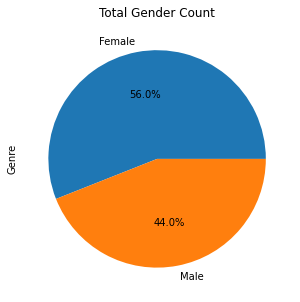

In [90]:
# pie chart for "Total Gender Count"

df['Genre'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Total Gender Count")
plt.show()

In [91]:
df['Genre'] = df['Genre'].replace(['Female','Male'],[0,1])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [92]:
# LabelEncoder for encoding binary categories in a column
#from sklearn.preprocessing import LabelEncoder
#from sklearn import metrics 
#le = LabelEncoder()  

# One single vector so it is ovbious what we want to encode
#df["Genre"] = le.fit_transform(df["Genre"])
#df

In [93]:
# Finding the optimum number of clusters using k-means
#data = df.copy()
x = df.iloc[:,[2,3]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'unclustered data')

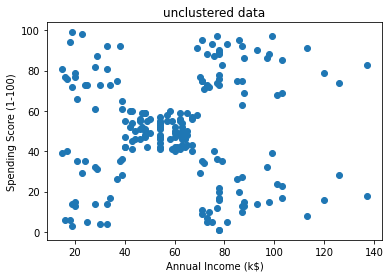

In [94]:
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('unclustered data')

In [95]:
#importing Kmean model
from sklearn.cluster import KMeans
wcss = []               #Within-Cluster Sum of Square creating list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(x)
    # appending the WCSS to the list 
    #(kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"-> wcss:",kmeans.inertia_)

k: 1 -> wcss: 269981.28
k: 2 -> wcss: 183653.32894736843
k: 3 -> wcss: 106348.37306211118
k: 4 -> wcss: 73679.78903948836
k: 5 -> wcss: 44448.45544793371
k: 6 -> wcss: 37265.86520484347
k: 7 -> wcss: 30241.343617936593
k: 8 -> wcss: 25338.024582200742
k: 9 -> wcss: 21996.523372372307
k: 10 -> wcss: 19704.123543147773


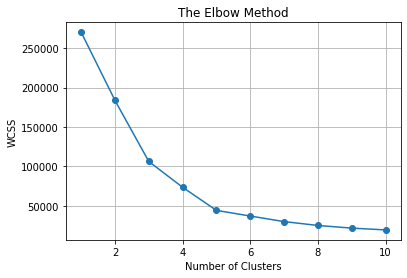

In [96]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [97]:
kmeans=KMeans(n_clusters=5)
labels=kmeans.fit_predict(x)
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [98]:
centroid=kmeans.cluster_centers_

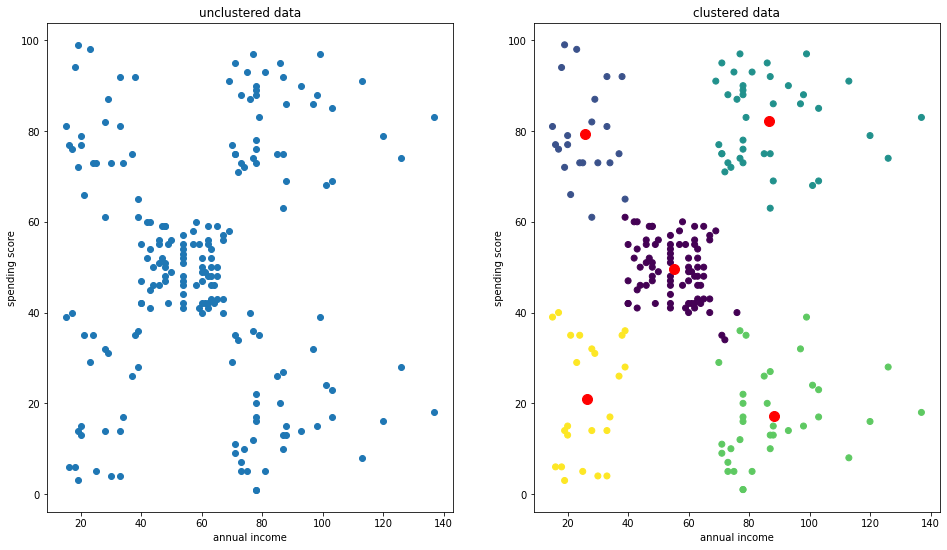

In [99]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)                   #1 row 2 cols and plot in 1st col
plt.title('unclustered data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

plt.subplot(1,2,2)                   #1 row 2 cols and plot in 2nd col
plt.title('clustered data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
           c=labels)
plt.scatter(centroid[:,0], centroid[:,1], s=100, c="red")   #all rows and 0 no col and all rows and 1 no column

In [100]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(data)
#predicting the labels of the input data
y=km1.predict(data)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

NameError: name 'data' is not defined

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','cyan','orange','magenta','dodgerblue'],s=100, data = data )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [101]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
aglabels = agc.fit_predict(x)
aglabels


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

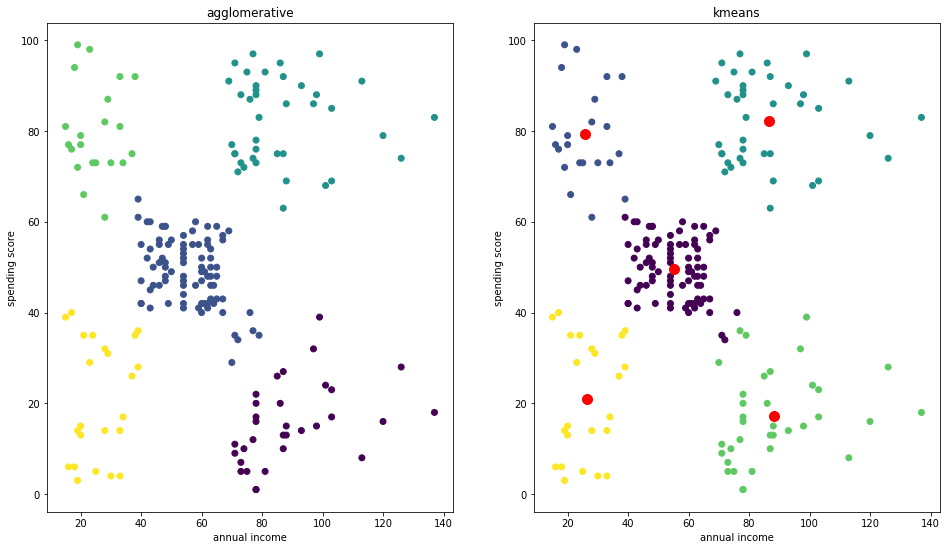

In [103]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)                   #1 row 2 cols and plot in 1st col
plt.title('agglomerative')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
           c=aglabels)

plt.subplot(1,2,2)                   #1 row 2 cols and plot in 2nd col
plt.title('kmeans')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'],
           c=labels)
plt.scatter(centroid[:,0], centroid[:,1], s=100, c="red")   #all rows and 0 no col and all rows and 1 no column

In [160]:
#kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
#y_kmeans = kmeans.fit_predict(X)

In [161]:
#Scatterplot of the clusters
#plt.figure(figsize=(6,4))
#plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')
#plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s=100, c='blue', label='Cluster 2')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s=100, c='green', label='Cluster 3')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3,1], s=100, c='cyan', label='Cluster 4')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4,1], s=100, c='magenta', label='Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centroids')
#plt.title('Spending Score (1-100) vs Annual Income (k$)')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)') 
#plt.legend()           
#plt.show()

In [163]:
data = df.copy()
data = data.iloc[:,[2,3]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


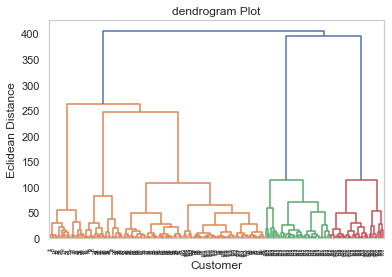

In [164]:
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram(shc.linkage(data,method="ward"))
plt.title("dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eclidean Distance")
plt.grid(False)

In [166]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
data["label"] = agc.fit_predict(data)
data

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


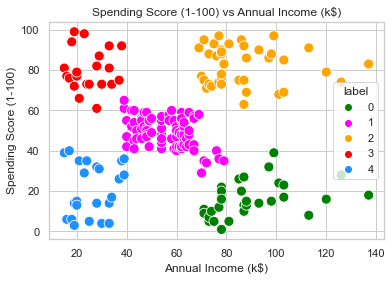

In [170]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','magenta','orange','red','dodgerblue'],s=100, data = data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()